In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score


In [7]:
data = pd.read_csv(r"/content/Life Expectancy Data.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.size

64636

In [12]:
data.nunique()

,0
Country,193
Year,16
Status,2
Life expectancy,362
Adult Mortality,425
infant deaths,209
Alcohol,1076
percentage expenditure,2328
Hepatitis B,87
Measles,958


In [13]:
data.isnull().sum()


,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [14]:
numeric_cols = data.select_dtypes(include='number').columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())


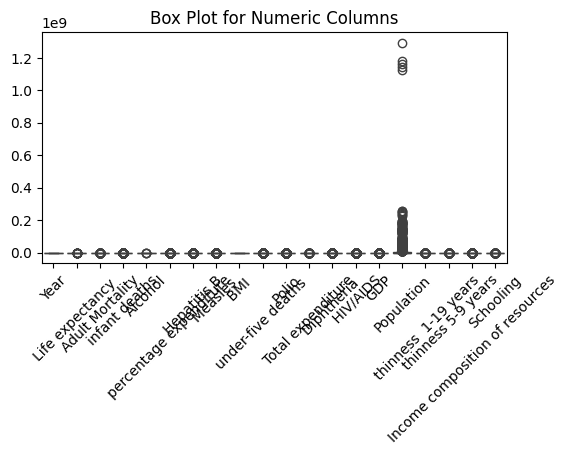

In [15]:
plt.figure(figsize=(6,3))
sns.boxplot(data=data[numeric_cols])
plt.title('Box Plot for Numeric Columns')
plt.xticks(rotation=45)
plt.show()

In [16]:
numeric_cols = data.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median_value = data[col].median()

    data.loc[data[col] < lower, col] = median_value
    data.loc[data[col] > upper, col] = median_value

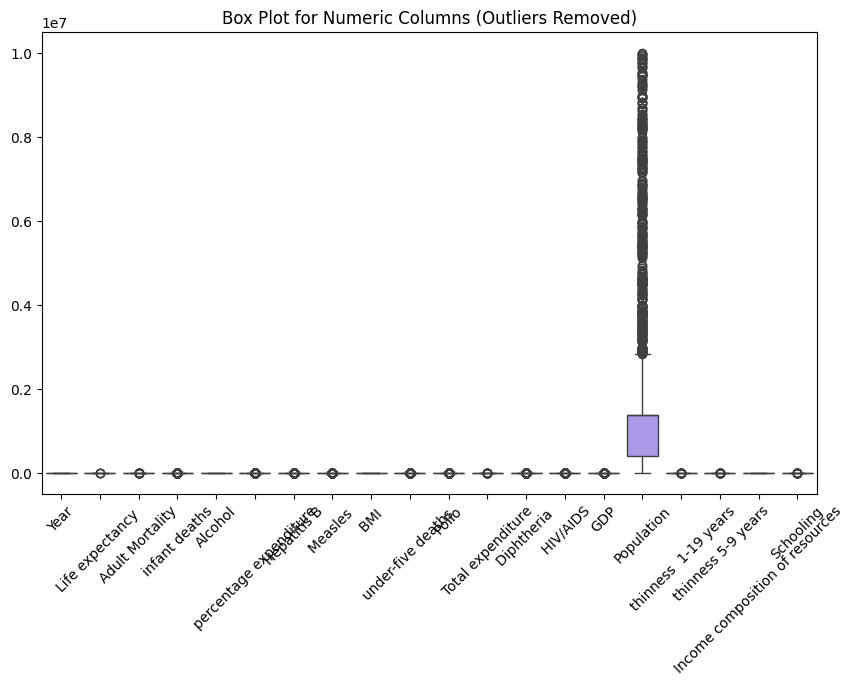

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data[numeric_cols])
plt.title('Box Plot for Numeric Columns (Outliers Removed)')
plt.xticks(rotation=45)
plt.show()

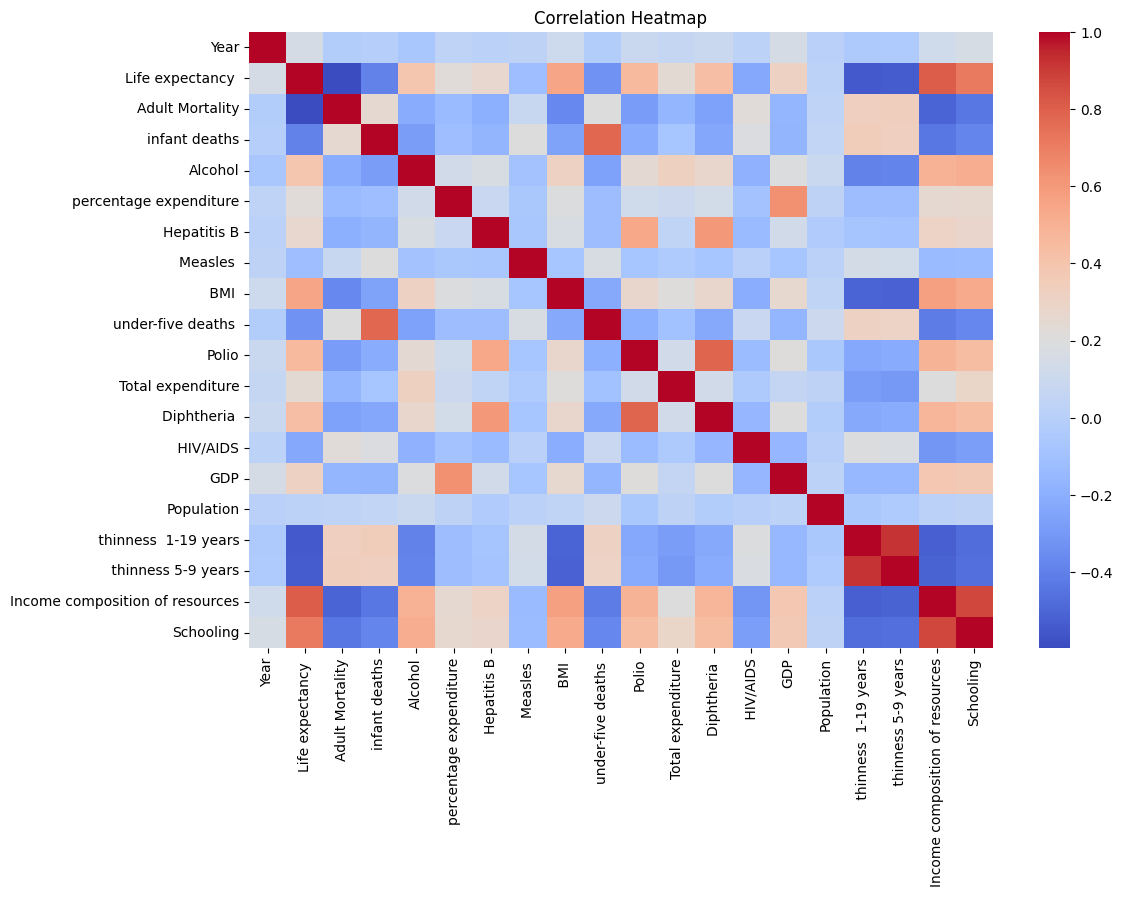

In [18]:
numeric_data = data.select_dtypes(include='number')
corr = numeric_data.corr()

plt.figure(figsize=(12,8))

sns.heatmap(corr,cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

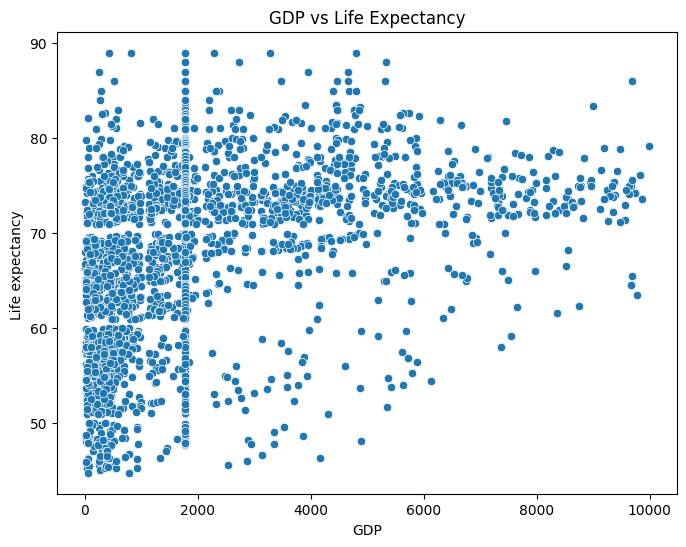

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['GDP'], y=data['Life expectancy '])
plt.title("GDP vs Life Expectancy")
plt.show()


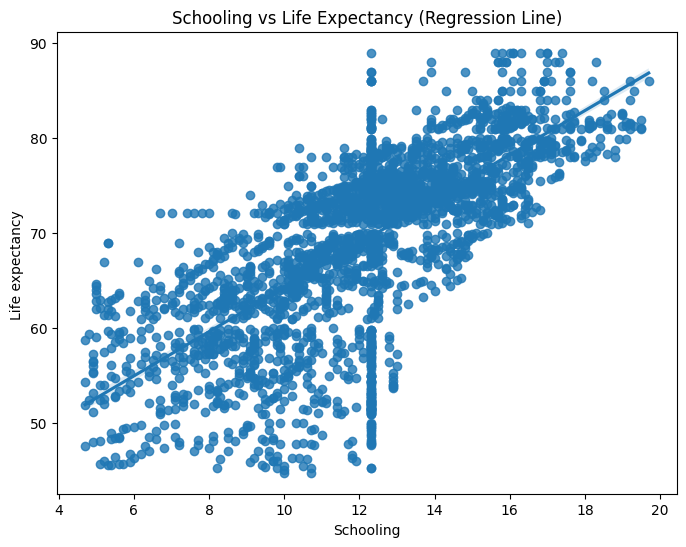

In [20]:
plt.figure(figsize=(8,6))
sns.regplot(x=data['Schooling'], y=data['Life expectancy '])
plt.title("Schooling vs Life Expectancy (Regression Line)")
plt.show()


In [21]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

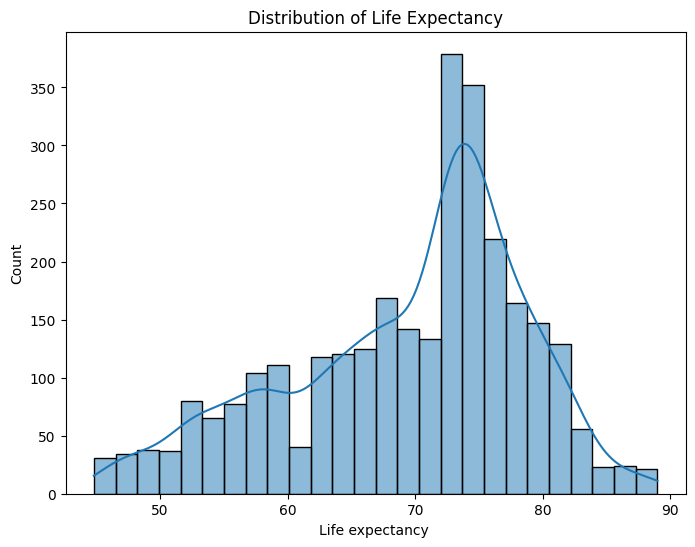

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(data['Life expectancy '], kde=True)
plt.title("Distribution of Life Expectancy")
plt.show()


In [23]:
X = data[['Schooling','GDP','Adult Mortality', ' BMI ']]
y = data["Life expectancy "]


In [24]:
X

,Schooling,GDP,Adult Mortality,BMI
0,10.1,584.259210,263.0,19.1
1,10.0,612.696514,271.0,18.6
2,9.9,631.744976,268.0,18.1
3,9.8,669.959000,272.0,17.6
4,9.5,63.537231,275.0,17.2
...,...,...,...,...
2933,9.2,454.366654,144.0,27.1
2934,9.5,453.351155,144.0,26.7
2935,10.0,57.348340,73.0,26.3
2936,9.8,548.587312,144.0,25.9


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train

,Schooling,GDP,Adult Mortality,BMI
2230,9.6,555.818538,226.0,21.7
4,9.5,63.537231,275.0,17.2
1530,16.4,1766.947595,24.0,59.0
1005,16.4,1766.947595,86.0,57.1
2293,12.1,8524.961236,185.0,28.7
...,...,...,...,...
763,12.3,94.729749,318.0,3.2
835,9.2,192.597330,32.0,24.0
1653,8.2,145.578380,28.0,29.4
2607,12.1,757.311444,165.0,15.1


In [26]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred =LR.predict(X_test)

In [28]:
print("Train Score:", LR.score(X_train, y_train))
print("Test Score:", LR.score(X_test, y_test))


Train Score: 0.622035158931149
Test Score: 0.6656524692498826


In [29]:
def plot_results(X,y):
    plt.scatter(X, y, color = 'red')
    plt.plot(X, LR.predict(X), color = 'blue')
    plt.title('Price of Hostels')
    plt.xlabel('Features')
    plt.ylabel('Price')
    plt.show()


In [30]:
score = r2_score(y_test, y_pred)

print("R^2 score:", "{:.0%}".format(score))

R^2 score: 67%


In [31]:
data['Status'] = data['Status'].map({'Developed':1, 'Developing':0})

X = data.drop(['Life expectancy '], axis=1)
y = data['Life expectancy ']

In [32]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(r2_score(y_test, y_pred))

0.8957707767068214


In [33]:
score = r2_score(y_test, y_pred)

print("R^2 score:", "{:.0%}".format(score))

R^2 score: 90%
